# **Proyek Analisis Data: E-Commerce Public Dataset**\
- Nama: Nicholas Febrian Liswanto
- Email: nicholas.febrian170203@gmail.com
- ID Dicoding: nicholas_f1702

## **Menentukan Pertanyaan Bisnis**


1. What are the most and least selling product?
2. What is the number of orders per month?
3. Where are the locations of the customers with the highest numbers based on geographic distribution?
4. How is the customer satisfaction level regarding our service?

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg
import matplotlib.dates as mdates

# Data Wrangling

## Gathering Data

In [ ]:
customers_df = pd.read_csv('/content/data/customers_dataset.csv')
geo_df = pd.read_csv('/content/data/geolocation_dataset.csv')
ord_items = pd.read_csv('/content/data/order_items_dataset.csv')
ord_pay = pd.read_csv('/content/data/order_payments_dataset.csv')
ord_rev = pd.read_csv('/content/data/order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/data/orders_dataset.csv')
prod_cat = pd.read_csv('/content/data/product_category_name_translation.csv')
products_df = pd.read_csv('/content/data/products_dataset.csv')
sellers_df = pd.read_csv('/content/data/sellers_dataset.csv')

## Assessing Data

**Pengecekan Data Null**

In [ ]:
print('\nData null customers:\n', customers_df.isnull().sum())
print('\nData null geolocation:\n', geo_df.isnull().sum())
print('\nData null order items:\n', ord_items.isnull().sum())
print('\nData null order payments:\n', ord_pay.isnull().sum())
print('\nData null order reviews:\n', ord_rev.isnull().sum())
print('\nData null orders:\n', orders_df.isnull().sum())
print('\nData null product category:\n', prod_cat.isnull().sum())
print('\nData null products:\n', products_df.isnull().sum())
print('\nData null sellers:\n', sellers_df.isnull().sum())


Data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
re

**Pengecekan Data Duplicate**

In [ ]:
print('Data duplikat customers:', customers_df.duplicated().sum())
print('Data duplikat geolocation:', geo_df.duplicated().sum())
print('Data duplikat order items:', ord_items.duplicated().sum())
print('data duplikat order payments:', ord_pay.duplicated().sum())
print('Data duplikat order reviews:', ord_rev.duplicated().sum())
print('Data duplikat orders:', orders_df.duplicated().sum())
print('Data duplikat product category:', prod_cat.duplicated().sum())
print('Data duplikat products:', products_df.duplicated().sum())
print('Data duplikat sellers:', sellers_df.duplicated().sum())

Data duplikat customers: 0
Data duplikat geolocation: 261831
Data duplikat order items: 0
data duplikat order payments: 0
Data duplikat order reviews: 0
Data duplikat orders: 0
Data duplikat product category: 0
Data duplikat products: 0
Data duplikat sellers: 0


# Cleaning Data

###Melakukan Fill pada data kosong

Terdapat duplikat di data geolocation, namun tidak bisa dilakukan drop duplikat karena data yang sama adalah nama kotanya.

In [ ]:
ord_rev.fillna(value="no comment", inplace=True)


In [ ]:
orders_df[orders_df.order_approved_at.isna()]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


### Mengubah Type Data time

In [ ]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  ord_items[column] = pd.to_datetime(ord_items[column])

datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  ord_rev[column] = pd.to_datetime(ord_rev[column])

datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  orders_df[column] = pd.to_datetime(orders_df[column])


In [ ]:
ord_items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
ord_rev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


# Exploratory Data Analysis (EDA)

## Explore customers_df

In [ ]:
customers_df.describe(include='all')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.customer_id.is_unique


True

In [ ]:
customers_df.customer_id.duplicated


<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


## Explore ord_pay

In [ ]:
ord_pay.describe(include='all')


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
ord_pay.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


## Explore order_df

In [ ]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4857,6ed7913722200b05e7d5df38f1ee777e,6454f48d32c3c0a57fcf9e1d25603ce9,delivered,2018-08-09 07:17:34,2018-08-09 07:30:12,2018-08-09 11:55:00,2018-08-15 12:02:57,2018-08-27
42652,4a0aef3a36c8f8f2d9500b15400ff513,3719c3d09981263d4cfc1b35953524e0,delivered,2017-05-11 20:10:56,2017-05-11 20:22:19,2017-05-17 15:27:01,2017-05-23 14:07:45,2017-06-02
59037,8f20a2bcde63b6e9b1d88a8b7bb9ca53,7107fc539b88dd4fb7fab4e60f9eeea3,delivered,2017-06-09 19:13:08,2017-06-09 19:22:07,2017-06-13 07:45:48,2017-06-23 10:57:28,2017-07-14
1665,beeec4fe9275a411277354695e721252,15a581dd2c1425a1a859d6dfe00d69bc,delivered,2018-05-06 21:42:44,2018-05-08 19:34:55,2018-05-09 12:35:00,2018-05-14 14:03:45,2018-06-04
48014,cc15fdac16a8e9226eae7423cda1ba45,63ef1bb30a3a15f90297210ac4cc6b6e,delivered,2017-06-07 23:36:26,2017-06-08 01:02:30,2017-06-08 17:22:48,2017-06-19 19:32:09,2017-06-30


### Menghitung Delivery Time

In [ ]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [ ]:
orders_df.sample(5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
81827,43d6342125d8088b91c7075c954bc592,cad98fd1dcf33315396326f7fdefd807,delivered,2018-08-05 14:49:53,2018-08-05 15:05:11,2018-08-06 14:08:00,2018-08-09 21:04:29,2018-08-15,3.0
49922,8440ebc9a2a4aaa712d4064c35e52995,31927091c573028dee0b8dff8ee57309,delivered,2017-12-05 21:30:15,2017-12-05 21:58:14,2017-12-06 21:41:57,2017-12-11 18:44:52,2018-01-03,5.0
76110,3c5a23a85fc2367a39de50010bb6adea,28786e407ecbca9896054fe60ce164db,delivered,2017-06-13 20:20:57,2017-06-14 19:25:09,2017-06-16 12:49:26,2017-06-19 16:15:48,2017-06-27,3.0
92979,3b5066af438aa1723c4e22290fe8dabd,9448711e9143b3cb9f54d8526bc8655d,delivered,2017-08-02 19:20:02,2017-08-03 03:04:44,2017-08-04 18:43:50,2017-08-12 15:05:50,2017-08-24,8.0
34228,05861bbf66a8cc3d5cdb6db76fece371,a0004afe35efb0e69a20cbe006d17e05,delivered,2018-04-17 18:04:16,2018-04-18 05:11:27,2018-04-18 16:22:28,2018-04-19 16:54:37,2018-04-30,1.0


<Axes: >

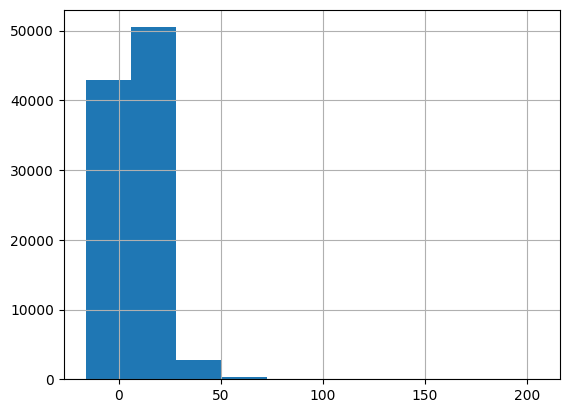

In [ ]:
orders_df.delivery_time.hist()


### Cek Berdasarkan Status Member

In [ ]:
customer_id_in_orders_df = orders_df.customer_id.values

customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
29759,31ff2c8266e8e49a331ce18e1c77f61b,57e088fe3e141da012d0a49f94df65f8,88090,florianopolis,SC,Active
88822,87d42d329efd998620e3892bb14ff360,f3961226d63f24b203a301baaaac70b3,3336,sao paulo,SP,Active
36849,39e2660b6789a449d35bd48bc54999dd,fde65d7bb1b30a86cc5cc0399b77e6b0,7011,guarulhos,SP,Active
10344,9db61f02788ba2a816117b4d7dc2d58b,71c98a01b26884386e5c68ac5b09054a,4836,sao paulo,SP,Active
87666,77a6136f49bac0c337eb24e043f624b4,842909a01087405cc84f9c41d519b3f4,54450,jaboatao dos guararapes,PE,Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()


,customer_id
status,
Active,99441


### Explore customer_df & orders_df

### Gabung/Merge customer_df & Order_df


In [ ]:
cust_orders = customers_df.merge(orders_df, on='customer_id', how='left')
cust_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [ ]:
cust_orders.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)


,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [ ]:
cust_orders.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)


,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
29101,101
13212,95
35162,93
22631,89


In [ ]:
cust_orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)


,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


## Explore orders_rev & orders_pay

### Merge orders_pay & orders_rev



In [ ]:
order_payrev = ord_pay.merge(ord_rev, on='order_id', how='left')
order_payrev.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [ ]:
order_payrev.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [ ]:
order_payrev.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [ ]:
order_payrev.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

## Explore customers_order & order_payrev

### Merge customers_order & order_payrev

In [ ]:
customers_df = cust_orders.merge(order_payrev, on='order_id', how='left')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


## Explore order_items & sellers_df

### Merge order_items & sellers_df

In [ ]:
item_seller_df = pd.merge(
    left=ord_items,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


## Explore products_df & product_cat

### Merge products_df & product_cat

In [ ]:
product_df = products_df.merge(prod_cat, on='product_category_name', how='left')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [ ]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


## Explore item_seller_df & product_df

### Merge item_seller_df & product_df

In [ ]:
sellers_df = product_df.merge(item_seller_df, on='product_id', how='left')
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [ ]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [ ]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

## Explore geo_df

In [ ]:
geo_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
717409,54535,-8.298306,-35.059336,cabo de santo agostinho,PE
675004,41250,-12.940649,-38.423785,salvador,BA
557084,30775,-19.891244,-43.966432,belo horizonte,MG
603406,35790,-18.749782,-44.430660,curvelo,MG
601305,35740,-19.763060,-44.312060,esmeraldas,MG


In [ ]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [ ]:
geo_df['geolocation_city'] = geo_df['geolocation_city'].apply(pretty_string)

In [ ]:
geo_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
20056,1
76370,1
63012,1


In [ ]:
geo_df[geo_df['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


## Explore All Data

### Gabungkan semua data

In [ ]:
all_data = customers_df.merge(sellers_df, on='order_id', how='left')
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [ ]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [ ]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [ ]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [ ]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

### Convert all_data to .csv

In [ ]:
all_data.to_csv('all_data.csv', index=False)

# Visualization & Explanatory Analysis

### 1. What are the most and least selling product?

In [ ]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-57-c9ace8509c7a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english",
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

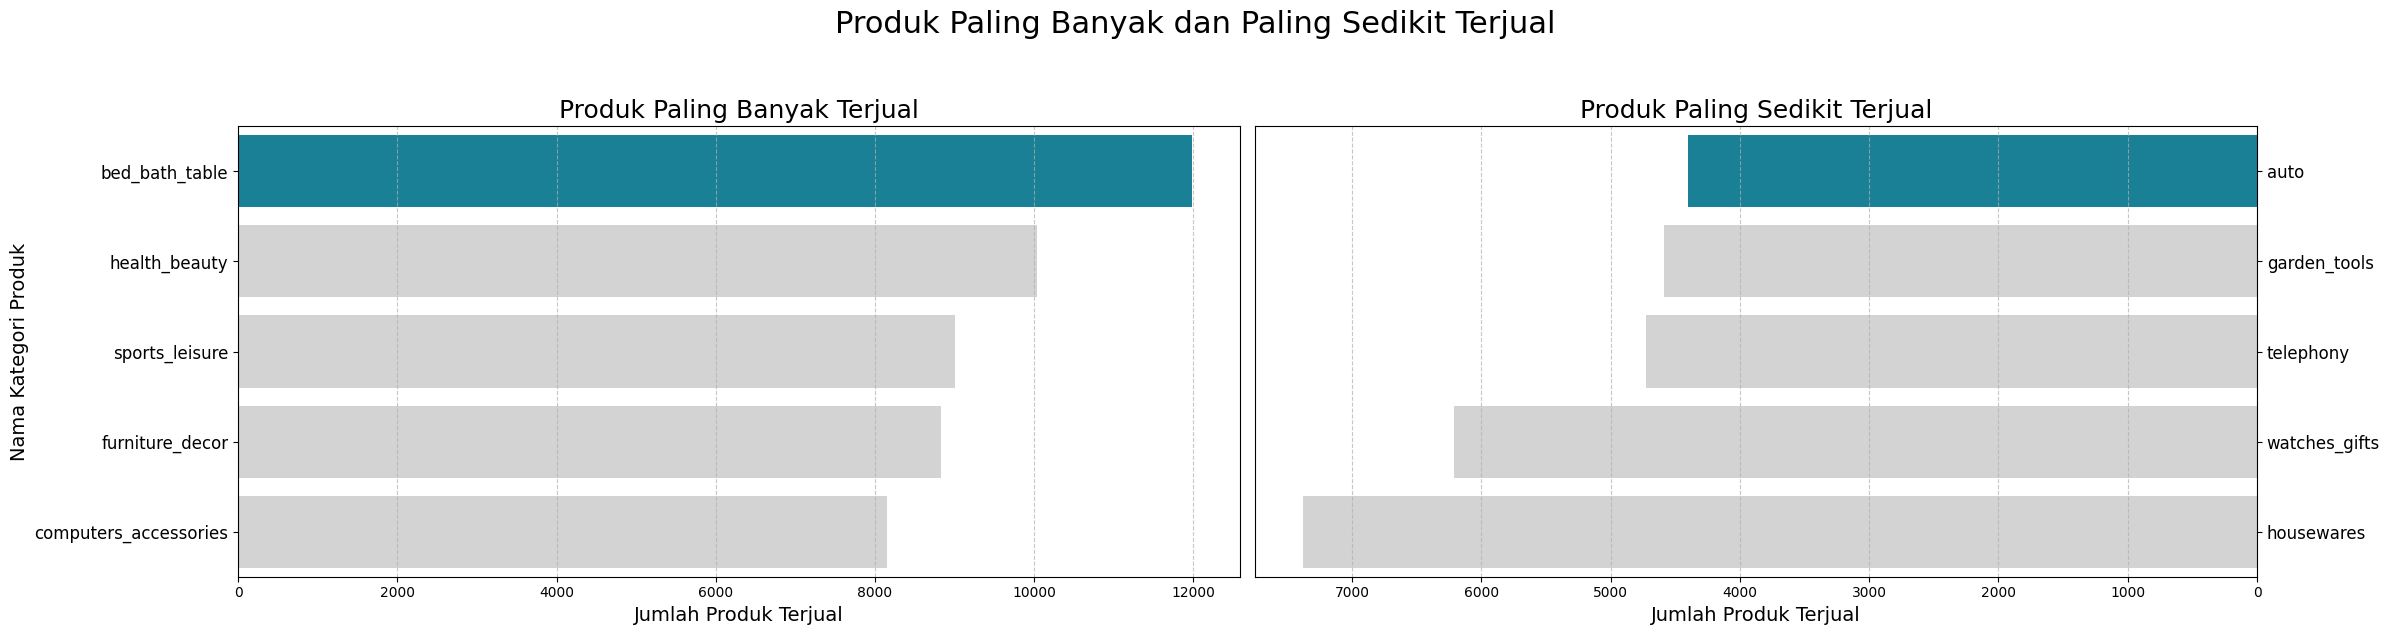

In [ ]:
# Subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Color Palette
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Barplot for most selling item
sns.barplot(x="products", y="product_category_name_english",
            data=sum_order_items_df.head(5),
            palette=colors, ax=ax[0])
ax[0].set_ylabel("Nama Kategori Produk", fontsize=14)
ax[0].set_xlabel("Jumlah Produk Terjual", fontsize=14)
ax[0].set_title("Produk Paling Banyak Terjual", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].grid(True, axis='x', linestyle='--', alpha=0.7)

# Barplot for least selling item
sns.barplot(x="products", y="product_category_name_english",
            data=sum_order_items_df.sort_values(by="products", ascending=True).head(5),
            palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jumlah Produk Terjual", fontsize=14)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Paling Sedikit Terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(True, axis='x', linestyle='--', alpha=0.7)

# Title
plt.suptitle("Produk Paling Banyak dan Paling Sedikit Terjual", fontsize=22, y=1.05)

# Show the plot
plt.tight_layout()
plt.show()

It can be seen from the graph above that the product with the highest sales is bed_bath_table, while the product with the lowest sales is auto.

---



### 2. What is the number of orders per month?

In [ ]:
monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df.head()

<ipython-input-58-cbc8b07f32de>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [ ]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [ ]:
monthly_df.head()

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176


In [ ]:
monthly_df.sort_values(by='order_count')

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


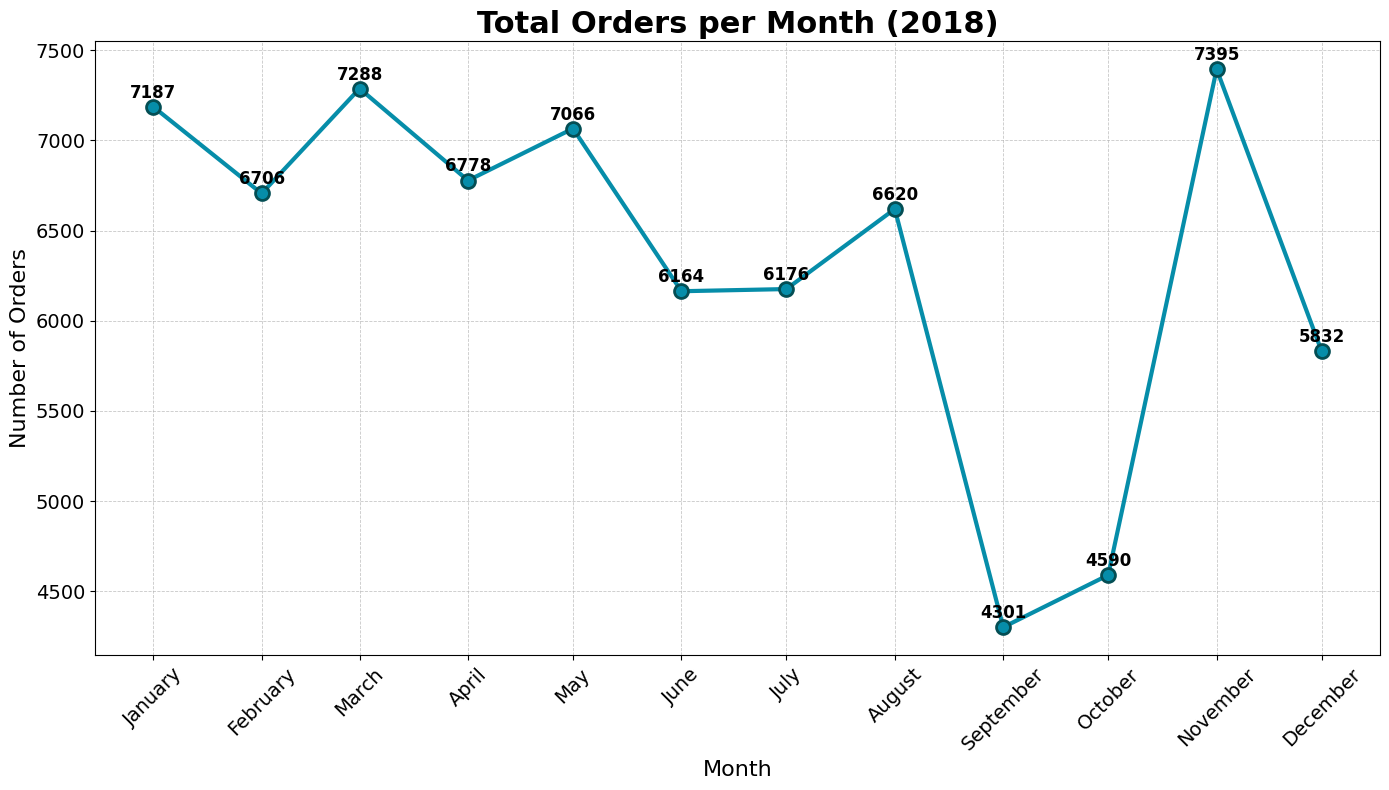

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Ensure the 'order_approved_at' is a datetime type
monthly_df['order_approved_at'] = pd.to_datetime(monthly_df['order_approved_at'], format='%B')

# Sort the DataFrame by the datetime column
monthly_df = monthly_df.sort_values('order_approved_at')

# Set figure size
plt.figure(figsize=(14, 8))

# Create the line plot with larger markers and thicker line
plt.plot(
    monthly_df['order_approved_at'],
    monthly_df['order_count'],
    marker='o',
    markersize=10,           # Increase marker size for visibility
    markerfacecolor="#068DA9",  # Fill color of markers
    markeredgewidth=2,        # Thicker border for markers
    markeredgecolor="#044E54",  # Darker border for markers
    linewidth=3,              # Thicker line for better visual
    color="#068DA9"
)

# Add annotations for each data point (order count)
for i, (date, count) in enumerate(zip(monthly_df['order_approved_at'], monthly_df['order_count'])):
    plt.text(date, count + 50, f"{count}", ha='center', fontsize=12, color='black', fontweight='bold')

# Add detailed x-axis formatting for months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format months as full names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set x-axis ticks for each month

# Add grid lines for better month-to-month comparison
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Add title and labels with larger font sizes
plt.title("Total Orders per Month (2018)", fontsize=22, fontweight='bold')
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Orders", fontsize=16)

# Adjust tick parameters for readability
plt.xticks(fontsize=14, rotation=45)  # Rotate month names for better readability
plt.yticks(fontsize=14)

# Ensure layout is tight to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### 3. Where are the locations of the customers with the highest numbers based on geographic distribution?

Based on Customer State

---



In [ ]:
bystate_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)


<ipython-input-64-2052028f1bf4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

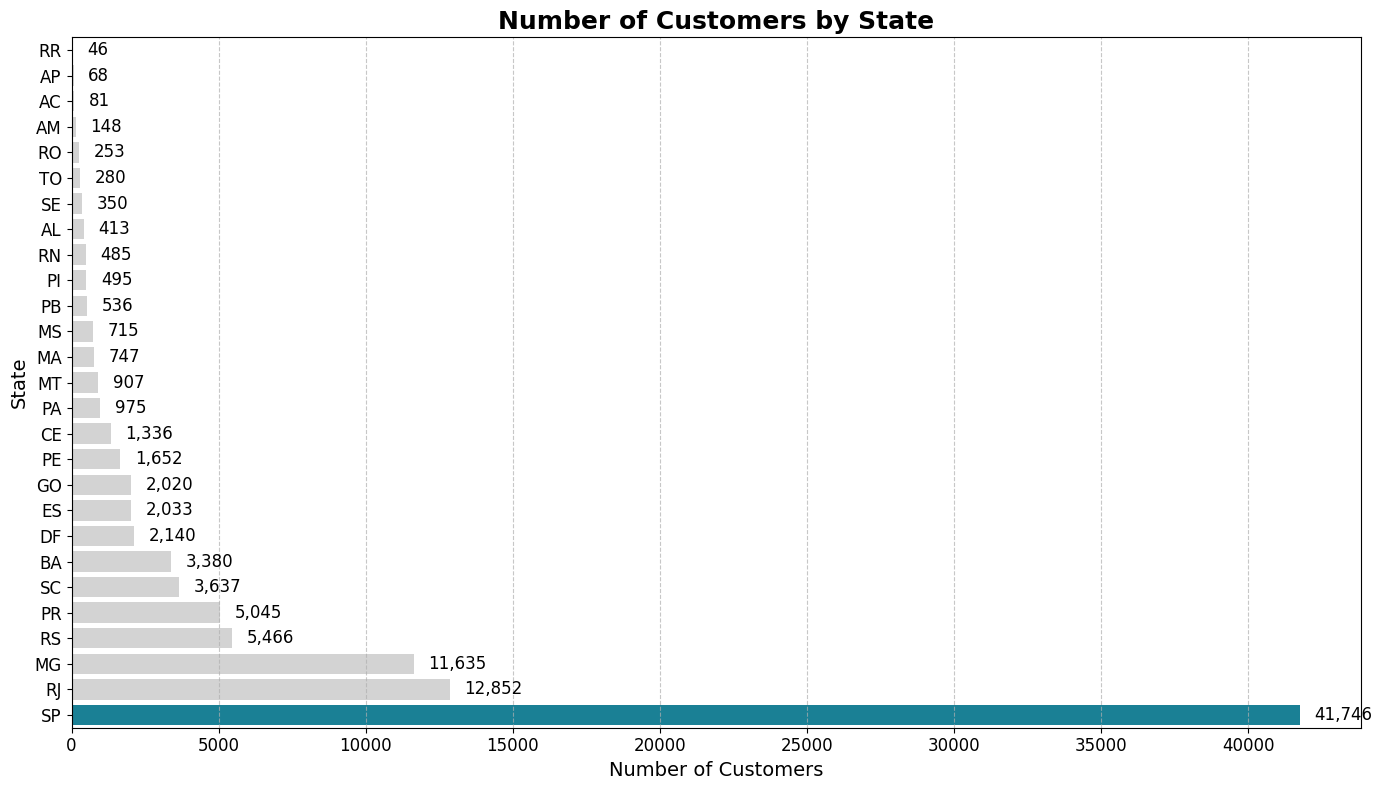

In [ ]:
plt.figure(figsize=(14, 8))

bystate_df = bystate_df.sort_values(by='customer_count', ascending=True)

most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

sns.barplot(
    x='customer_count',
    y='customer_state',
    data=bystate_df,
    palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]
)

for i, value in enumerate(bystate_df['customer_count']):
    plt.text(value + 500, i, f"{value:,}", va='center', fontsize=12, color='black')

plt.title("Number of Customers by State", fontsize=18, fontweight='bold')
plt.xlabel("Number of Customers", fontsize=14)
plt.ylabel("State", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a light grid for better readability

plt.tight_layout()
plt.show()


Based on the City

---



<ipython-input-65-418c893d57d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

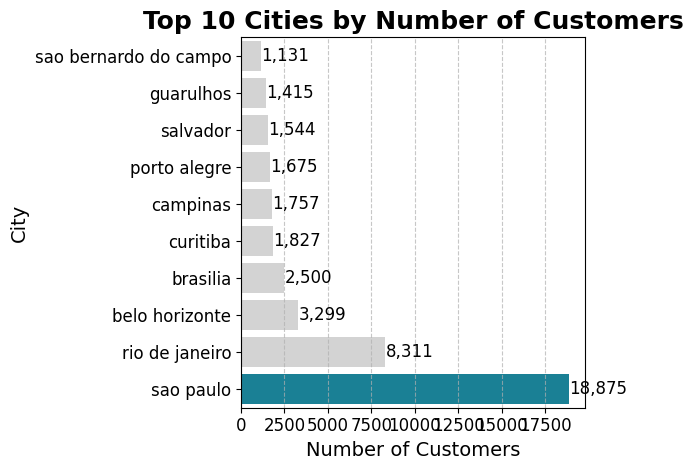

In [ ]:
bycity_df = all_data['customer_city'].value_counts().head(10)
most_common_city = bycity_df.idxmax()
bycity_df = bycity_df.sort_values(ascending=True)  # Sort ascending for horizontal bars

sns.barplot(
    x=bycity_df.values,
    y=bycity_df.index,
    palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in bycity_df.index]
)

for i, value in enumerate(bycity_df.values):
    plt.text(value + 5, i, f"{value:,}", va='center', fontsize=12, color='black')

plt.title("Top 10 Cities by Number of Customers", fontsize=18, fontweight='bold')
plt.xlabel("Number of Customers", fontsize=14)
plt.ylabel("City", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The Geographic Distribution

---



In [ ]:
other_state_geolocation = geo_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geo_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = geo_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
customers_silver.to_csv("geolocation.csv", index=False)

In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

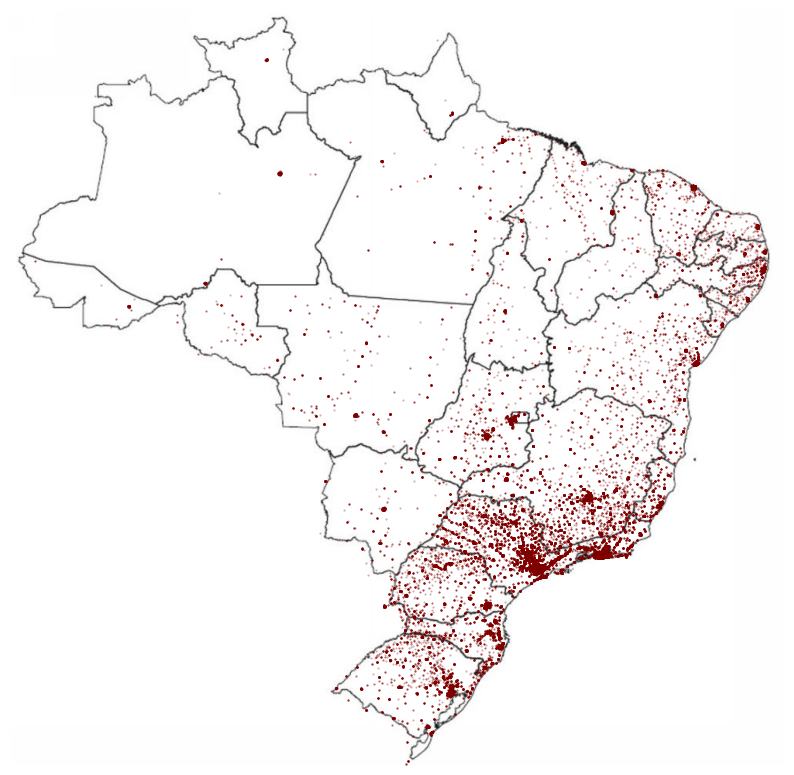

In [ ]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))


### 4. How is the customer satisfaction level regarding our service?

<ipython-input-72-a881c5dce057>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_scores.index,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need t

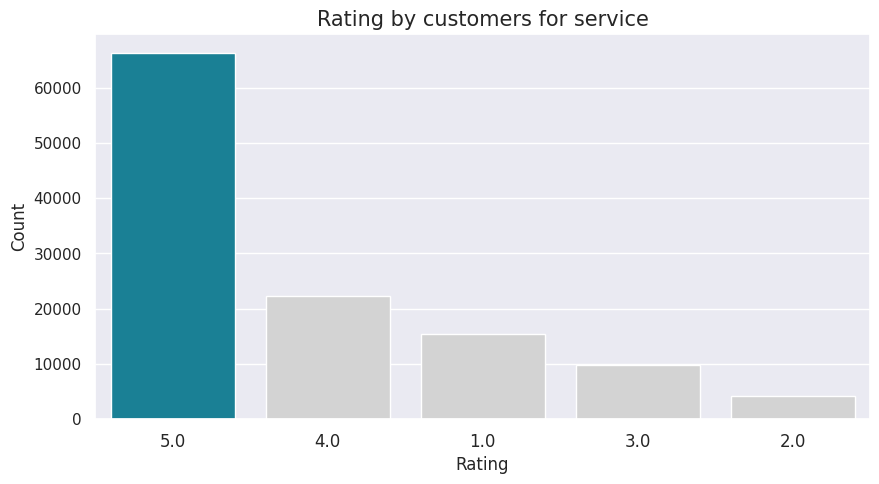

In [ ]:
review_scores = all_data['review_score'].value_counts().sort_values(ascending=False)

most_common_score = review_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores.index,
            y=review_scores.values,
            order=review_scores.index,
            palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in review_scores.index]
            )

plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

# Conclusion
---

### 1. What are the most and least selling product?

*   The data results show that customers most frequently purchase bed_bath_table products, while auto products are the least purchased.

### 2. What is the number of orders per month?

*   E-commerce sales performance remained stable from January to May, saw a slight decline in June and July, followed by a minor increase in August. There was a significant drop in September, but sales surged dramatically in October and November, before dropping again in December.

### 3. Where are the locations of the customers with the highest numbers based on geographic distribution?

*   The state with the most customers is SP, indicating that São Paulo has the most customers, followed by RJ (Rio de Janeiro) in second place. The majority of customer orders have a status of "delivered," meaning the items were successfully shipped without issues, which also correlates with customers giving a 5-star rating for the e-commerce service. According to the graph, more customers are in the southeastern and southern regions. Additionally, there is a higher concentration of customers in capital cities.

### 4. How is the customer satisfaction level regarding our service?


*   Based on the data collected and analyzed, customer satisfaction with the provided service is very high. As seen in the graph, 5-star ratings are the most common, followed by 4-star ratings in second place.



